### **자전거 대여 수요 예측**
p362~

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)

In [5]:
bike_df=pd.read_csv('bike_train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
#datatime 칼럼 -> 년,월,일,시간 칼럼 추출

bike_df['datetime']=bike_df.datetime.apply(pd.to_datetime) #넘파이에 원래 이런 매소드

bike_df['year'] = bike_df.datetime.apply(lambda x : x.year) 
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month) 
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day) 
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour) 

bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [12]:
# 불필요 칼럼 드롭
drop_cols=['datetime','casual','registered']
bike_df.drop(drop_cols,axis=1,inplace=True)

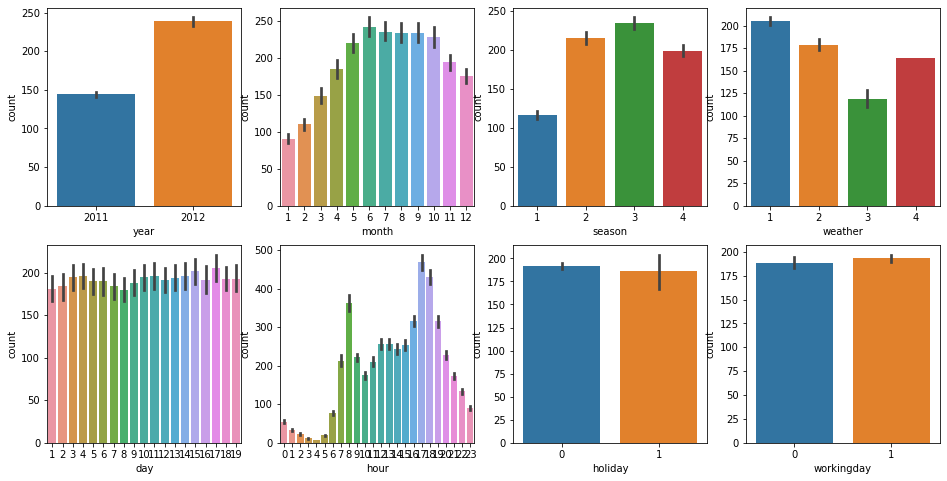

In [21]:
# 시각화
# sns 시각화 따로 더 공부하기
fig, axs=plt.subplots(figsize=(16,8),ncols=4,nrows=2)
cat_features=['year','month','season','weather','day','hour','holiday','workingday']
for i,feature in enumerate(cat_features):
    row=int(i/4)
    col=i%4
    sns.barplot(x=feature,y='count',data=bike_df,ax=axs[row][col])

In [23]:
#성능평가함수 만들기

from sklearn.metrics import mean_squared_error,mean_absolute_error

def rmsle(y,pred):
    log_y=np.log1p(y)#1+log값 반환으로 언더/오버플로 오류 방지
    log_pred=np.log1p(pred)
    squared_error=(log_y-log_pred)**2
    rmsle=np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y,pred):
    rmsle_val=rmsle(y,pred)
    rmse_val=rmse(y,pred)
    mae_val=mean_absolute_error(y,pred)
    print("RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}".format(rmsle_val,rmse_val,mae_val))

In [24]:
#LinearRegression 객체 이용 회귀 예측
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LinearRegression , Ridge , Lasso 

y_target=bike_df['count']
X_features=bike_df.drop(['count'],axis=1,inplace=False)

X_train , X_test, y_train , y_test = train_test_split(X_features, y_target ,test_size=0.3,random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
pred=lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


In [31]:
#오류값 가장 큰 순으로 몇개 살펴보기

def get_top_error_data(y_test,pred,n_tops=5):
    result_df=pd.DataFrame(y_test.values,columns=['real_count'])
    result_df['predicted_count']=np.round(pred)
    result_df['diff']=np.abs(result_df['real_count']-result_df['predicted_count'])
    
    print(result_df.sort_values('diff',ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


In [27]:
y_test.values.shape #시리즈 객체임

(3266,)

<Axes: >

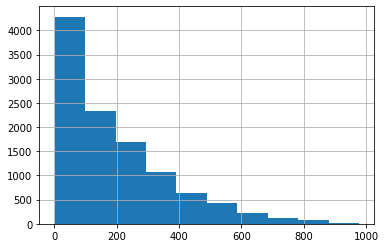

In [34]:
y_target.hist()

<Axes: >

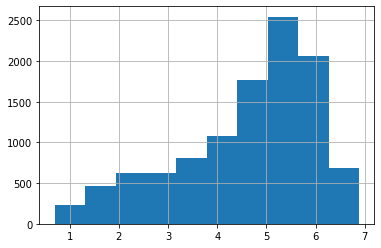

In [35]:
y_log_transform=np.log1p(y_target)
y_log_transform.hist()

In [36]:
#변환한 타깃값으로 다시 학습 후 평가

y_target_log=np.log1p(y_target)
X_train , X_test , y_train , y_test = train_test_split(X_features, y_target_log , test_size=0.3 , random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
pred=lr_reg.predict(X_test)

#원래 스케일로 변환
y_test_exp=np.expm1(y_test)
pred_exp = np.expm1(pred) 

evaluate_regr(y_test_exp, pred_exp) 


RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


<Axes: >

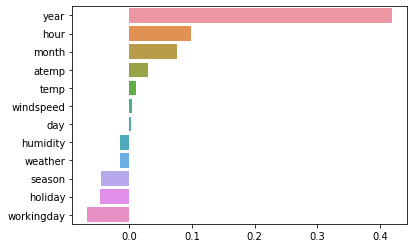

In [38]:
#회귀 계숫값 시각화
coef = pd.Series(lr_reg.coef_, index=X_features.columns) 
coef_sort = coef.sort_values(ascending=False) 
sns.barplot(x=coef_sort.values, y=coef_sort.index)

#year,month,hour 등 숫자형으로 표현 but actually 카테고리형 -> 원핫인코딩

In [39]:
#원-핫 인코딩 적용
X_features_ohe = pd.get_dummies(X_features, columns=['year','month','day','hour','holiday','workingday','season','weather'])



In [40]:
X_features_ohe #원핫인코딩 완료된 DF

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10882,14.76,17.425,57,15.0013,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10883,13.94,15.910,61,15.0013,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10884,13.94,17.425,61,6.0032,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [56]:
X_train,X_test,y_train,y_test = train_test_split(X_features_ohe , y_target_log ,
                                                 test_size=0.3,random_state=1)
#처음부터 로그변환된 y값 사용

def get_model_predict(model,X_train,X_test,y_train,y_test,is_expm1=False):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    if is_expm1: #다시 원래 단위로 변환
        y_test=np.expm1(y_test)
        pred=np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test,pred)

lr_reg=LinearRegression()
ridge_reg=Ridge(alpha=10)
lasso_reg=Lasso(alpha=0.01)

for model in [lr_reg,ridge_reg,lasso_reg] : 
    get_model_predict(model ,X_train , X_test, y_train , y_test , is_expm1=True) 
    print()

### LinearRegression ###
RMSLE: 0.583, RMSE: 95.624, MAE: 62.886

### Ridge ###
RMSLE: 0.585, RMSE: 96.658, MAE: 63.552

### Lasso ###
RMSLE: 0.636, RMSE: 112.616, MAE: 72.970



<Axes: >

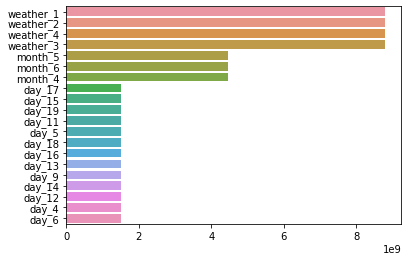

In [57]:
#회귀 계숫값 높은 피처 시각화
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns) 
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [58]:
X_features_ohe.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'year_2011', 'year_2012',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8',
       'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15',
       'day_16', 'day_17', 'day_18', 'day_19', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'holiday_0', 'holiday_1', 'workingday_0',
       'workingday_1', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [59]:
from sklearn .ensemble import RandomForestRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor 
from lightgbm import LGBMRegressor

In [60]:
rf_reg = RandomForestRegressor(n_estimators=500) 
gbm_reg = GradientBoostingRegressor(n_estimators=500) 
xgb_reg = XGBRegressor(n_estimators=500) 
lgbm_reg = LGBMRegressor(n_estimators=500) 

for model in [rf_reg,gbm_reg,xgb_reg,lgbm_reg]:
    get_model_predict(model,X_train.values,X_test.values,y_train.values,y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.344, RMSE: 47.507, MAE: 29.969
### GradientBoostingRegressor ###
RMSLE: 0.334, RMSE: 53.873, MAE: 33.891
### XGBRegressor ###
RMSLE: 0.335, RMSE: 50.277, MAE: 31.179
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.576356
### LGBMRegressor ###
RMSLE: 0.310, RMSE: 44.620, MAE: 27.778
